# Charles Fearn

In [46]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from math import sqrt
from sklearn.linear_model import Ridge
from math import ceil
from scipy import linalg
from IPython.display import Image
from IPython.display import display
plt.style.use('seaborn-white')
%matplotlib inline

<ipython-input-46-ecfe7993c3f9>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


# Part 1 Linear Regression

### Dataset 1: p1d1_data.csv

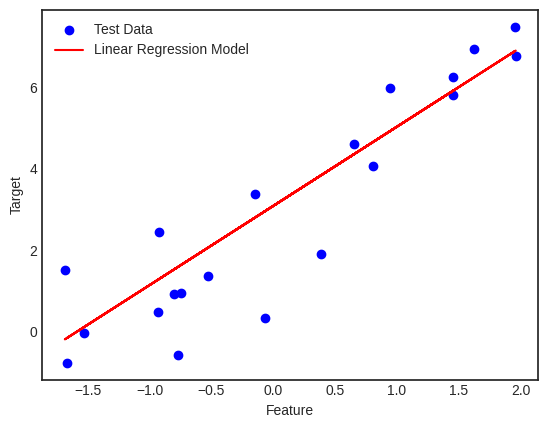


Coefficients: [1.94534071]
Mean squared error: 1.24
Coefficient of Determination: 0.8301100961059973


In [47]:
#read in csv files
p1d1 = pd.read_csv("p1d1_data.csv")
# p1d1.head()
# 1. divide train and test
X = p1d1[['x']]
y = p1d1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2. use linera regression
model = LinearRegression()
# Train the model using the training sets
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Scatter plot of the data
plt.scatter(X_test, y_test, label='Test Data', color='blue')

# Plot the model's predictions
plt.plot(X_test, model.predict(X_test), color='red', label='Linear Regression Model')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Show plot and print mean squared error and coefficients
plt.show()
print()
# 4. coefficients
print(f'Coefficients: {model.coef_}')
# 5. Root Mean Square Error and coefficient of determination r2
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print(f'Coefficient of Determination: {r2_score(y_test, y_pred)}')

# Dataset 2: p1d2_data.csv

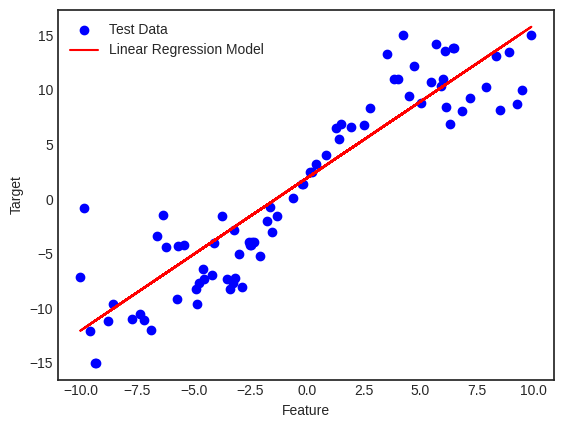

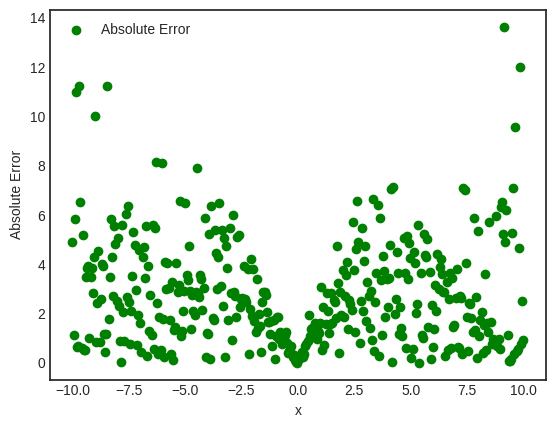

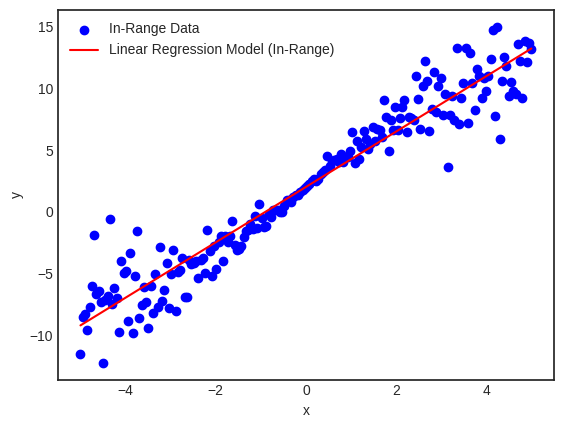


Updated Model for In-Range Data:
Intercept (b0): 2.014407229920418
Slope (b1): 2.250438342688707
Operational Range: -5 to 5
Root Mean Square Error (RMSE) within the operational range: 1.8377334223966657
Coefficient of Determination (R^2) within the operational range: 0.9262476564971773


In [48]:
#load data
p1d2 = pd.read_csv("p1d2_data.csv")
# p1d2.head()
X = p1d2[['x']]
y = p1d2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#use linera regression
model = LinearRegression()
# Train the model using the training sets
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 1. Scatter plot of the data
plt.scatter(X_test, y_test, label='Test Data', color='blue')

# Plot the model's predictions
plt.plot(X_test, model.predict(X_test), color='red', label='Linear Regression Model')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

y_pred = model.predict(X)

# Calculate the absolute error for each data point
error = np.abs(y - y_pred)

# 2. Plot the error as a function of 'x'
plt.scatter(X, error, label='Absolute Error', color='green')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend()


# Show the plot
plt.show()
# Define an operational range based on your analysis of the data
#  range [min_x, max_x]
min_x = -5
max_x = 5
# Create separate dataframes for in-range and out-of-range data
in_range_data = p1d2[(p1d2['x'] >= min_x) & (p1d2['x'] <= max_x)]
out_of_range_data = p1d2[(p1d2['x'] < min_x) | (p1d2['x'] > max_x)]

# Create a linear regression model for in-range data
X_in_range = in_range_data[['x']]
y_in_range = in_range_data['y']
model_in_range = LinearRegression()
model_in_range.fit(X_in_range, y_in_range)

# Scatter plot of the in-range data
plt.scatter(X_in_range, y_in_range, label='In-Range Data', color='blue')

# Plot linear regression model for in-range data
plt.plot(X_in_range, model_in_range.predict(X_in_range), color='red', label='Linear Regression Model (In-Range)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

y_pred_in_range = model_in_range.predict(X_in_range)

rmse_in_range = np.sqrt(mean_squared_error(y_in_range, y_pred_in_range))

r2_in_range = r2_score(y_in_range, y_pred_in_range)

# Output the updated model coefficients, operational range, RMSE, and R-squared for in-range data
print()
print("Updated Model for In-Range Data:")
print(f"Intercept (b0): {model_in_range.intercept_}")
print(f"Slope (b1): {model_in_range.coef_[0]}")
print(f"Operational Range: {min_x} to {max_x}")
print(f"Root Mean Square Error (RMSE) within the operational range: {rmse_in_range}")
print(f"Coefficient of Determination (R^2) within the operational range: {r2_in_range}")

After taking a look through the data, it appears that our values are between -10 and 10. when we have our operational range set to -10 and 10(min and max), our mean square error is 3.5. which isn't horrible, but if we narrow our range to -5 and 5, we see this drop to 1.8. Because we don't actually know what this data represents,it's kind of hard to say what this is means.

# Dataset 3: p1d3_data.npz

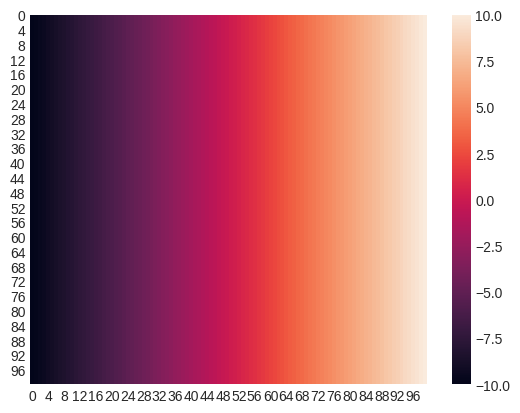

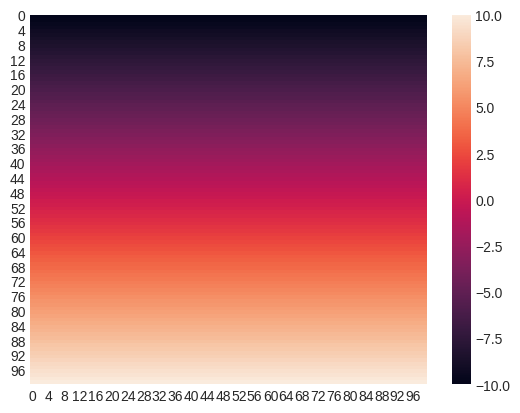

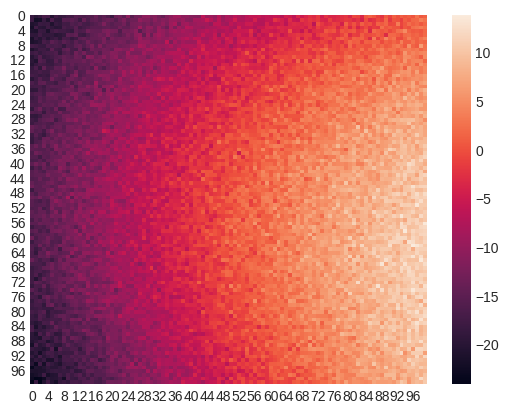

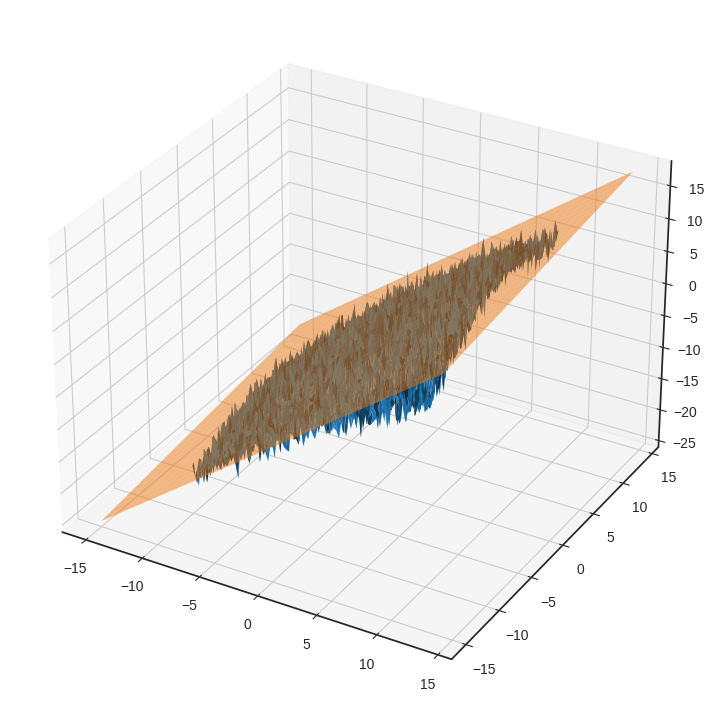

x coefficient is 1.319554078715696
y coefficient is 0.16428356412081777
intercept is -2.9031410186304067


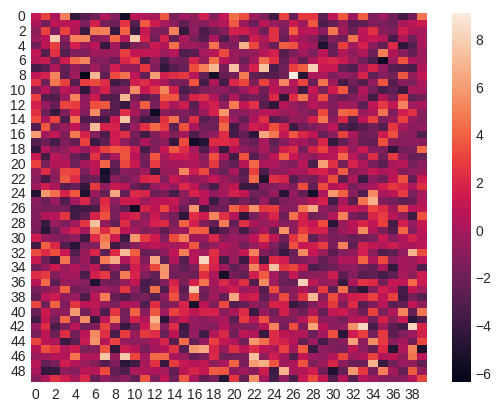

Locally Weighted Linear Regression (using lowess) Results:
RMSE: 4.259451481671608
Coefficient of Determination (R^2): 0.7255535966704769


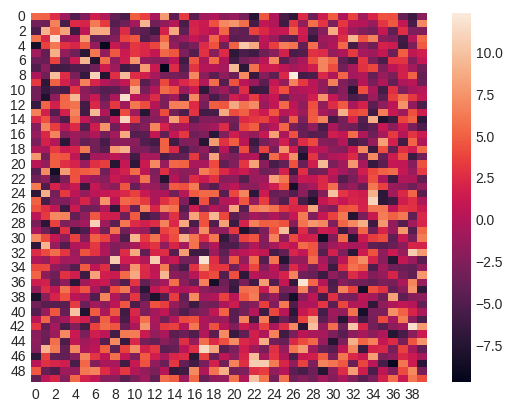

+-------------------+---------+----------+
| Error Type        |    RMSE |       R2 |
+===================+=========+==========+
| Linear Regression | 2.56877 | 0.900184 |
+-------------------+---------+----------+
| Locally Weighted  | 4.25945 | 0.725554 |
+-------------------+---------+----------+


In [49]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns



data = np.load('p1d3_data.npz')


X =data['X']
Y = data['Y']
Z = data['Z']

# Part 1 #

# Heat Mapping of each variable
p1x = sns.heatmap(X)
plt.show()
p1y = sns.heatmap(Y)
plt.show()
p1z = sns.heatmap(Z)
plt.show()

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

ax.plot_surface(X, Y, Z)

# Part 2 #

Xnew =np.concatenate((X.reshape(10000,1), Y.reshape(10000,1)), 1)
y =np.array(Z.flatten())
X_train, X_test, y_train, y_test= train_test_split(Xnew,y, test_size=0.2)


# Part 3 #

model = LinearRegression()
model.fit(X_train, y_train)
coefs = model.coef_
intercept = model.intercept_


xs = np.tile(np.arange(30)-15,(30,1))
ys = np.tile(np.arange(30)-15, (30,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()



# Part 4 #

print("x coefficient is "+str(coefs[0]))
print("y coefficient is "+str(coefs[1]))
print("intercept is "+str(intercept))
ypredlin= model.predict(X_test)
rmse_lin = sqrt(mean_squared_error(y_test, ypredlin))
r2_lin = r2_score(y_test, ypredlin)



# Part 5 #

perr = ypredlin-y_test
perr= perr.reshape(50,40)
p2 = sns.heatmap(perr)
plt.show()



# Part 6 #

# part 6 is in the following text cell


##########
# Part 7 #
##########
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Fit locally weighted linear regression using lowess for each feature
y_pred_lowess_list = []


lowess_smoothed = sm.nonparametric.lowess(y_train, X_train[:,0])
y_pred_lowess = np.interp(X_test[:,0], lowess_smoothed[:, 0], lowess_smoothed[:, 1])
y_pred_lowess_list.append(y_pred_lowess)

lowess_smoothed = sm.nonparametric.lowess(y_train, X_train[:,1])
y_pred_lowess = np.interp(X_test[:,1], lowess_smoothed[:, 0], lowess_smoothed[:, 1])
y_pred_lowess_list.append(y_pred_lowess)
# Combine predictions for all features
y_pred_lowess = np.mean(y_pred_lowess_list, axis=0)

# Calculate RMSE and Coefficient of Determination for lowess
rmse_lowess = sqrt(mean_squared_error(y_test, y_pred_lowess))
r2_lowess = r2_score(y_test, y_pred_lowess)

print("Locally Weighted Linear Regression (using lowess) Results:")
print("RMSE:", rmse_lowess)
print("Coefficient of Determination (R^2):", r2_lowess)



# Part 8 #

perrL = y_pred_lowess-y_test
perrL= perrL.reshape(50,40)
p3 = sns.heatmap(perrL)
plt.show()

from tabulate import tabulate



# Part 9 #

# assign data
mydata = [
    ["Linear Regression", rmse_lin,r2_lin],
    ["Locally Weighted", rmse_lowess,r2_lowess]
]

# create header
head = ["Error Type","RMSE", "R2"]

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

##########
# Part 6 #
##########

Originally the data was in a single line, making the heatmap basically useless. Reshaping the vector made a more usefull heat map.

# Part 2 Binary Classification

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


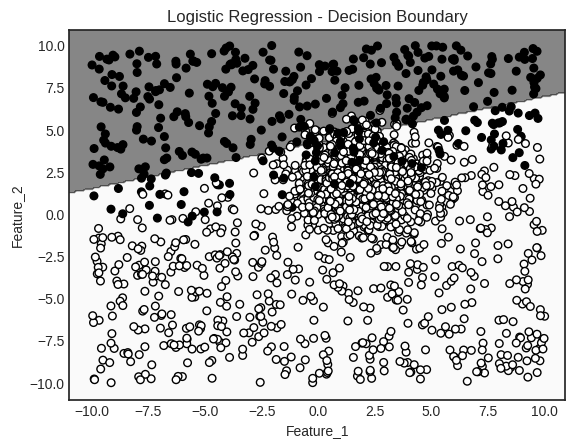


Model Coefficients: [[-0.32620081  1.19979887]]
Model Intercept: [-5.06557945]
Error Rate: 0.0625


In [50]:
data = pd.read_csv('p2d1_data.csv')
# Extract features and target variable from the dataset
X = data[['Feature_1', 'Feature_2']]
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
# Train the model using the training sets
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
X=X.to_numpy()

# plt.figure(figsize=(10,6))

# Selecting ranges for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)



plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=30)
plt.title('Logistic Regression - Decision Boundary')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()
#print coefficients, intercept
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Output error rate on the test set
error_rate = 1 - model.score(X_test, y_test)
print("Error Rate:", error_rate)

Could a non_linear model improve the error rate? we could always try using support vectors or decision tree to see if they improve. Using SVM, we can change the hyperparameters to find what minimizes the error and see if that works

### Data Set 2: p2d2_data.csv

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


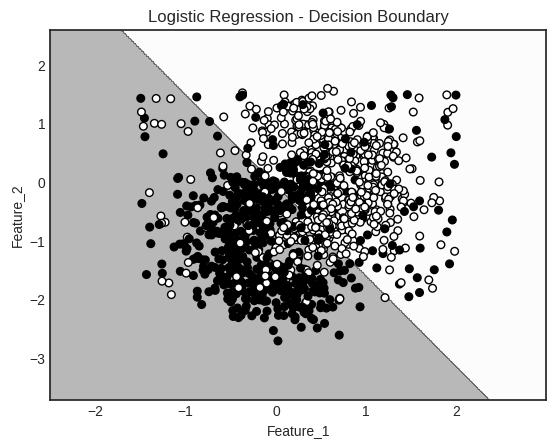

Model Coefficients: [[-1.46282656 -0.94533752]]
Model Intercept: [-0.05186207]
Error Rate: 0.23333333333333328


In [51]:
# Load the data from the CSV file
data2 = pd.read_csv('p2d2_data.csv')

# Extract features and target variable from the dataset
X2 = data2[['Feature_1', 'Feature_2']]
y2 = data2['Label']

# 1. Divide into training set and a test set.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 2. Train a model using logistic regression.
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

# 3. Output the data labeling each sample according to its class, and color the background.
# plot decision boundary
x_min2, x_max2 = X2.iloc[:, 0].min() - 1, X2.iloc[:, 0].max() + 1
y_min2, y_max2 = X2.iloc[:, 1].min() - 1, X2.iloc[:, 1].max() + 1

xx2, yy2 = np.meshgrid(np.arange(x_min2, x_max2, 0.01), np.arange(y_min2, y_max2, 0.01))

Z2 = model2.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z2 = Z2.reshape(xx2.shape)

plt.contourf(xx2, yy2, Z2, alpha=0.3)
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=y2, edgecolors='k', marker='o', s=30)
plt.title('Logistic Regression - Decision Boundary')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()

# 4. Output model coefficients and the error rate.
print("Model Coefficients:", model2.coef_)
print("Model Intercept:", model2.intercept_)

# 5. error rate on the test set
error_rate2 = 1 - model2.score(X2_test, y2_test)
print("Error Rate:", error_rate2)


# Part 3: Regression using Wine Quality dataset

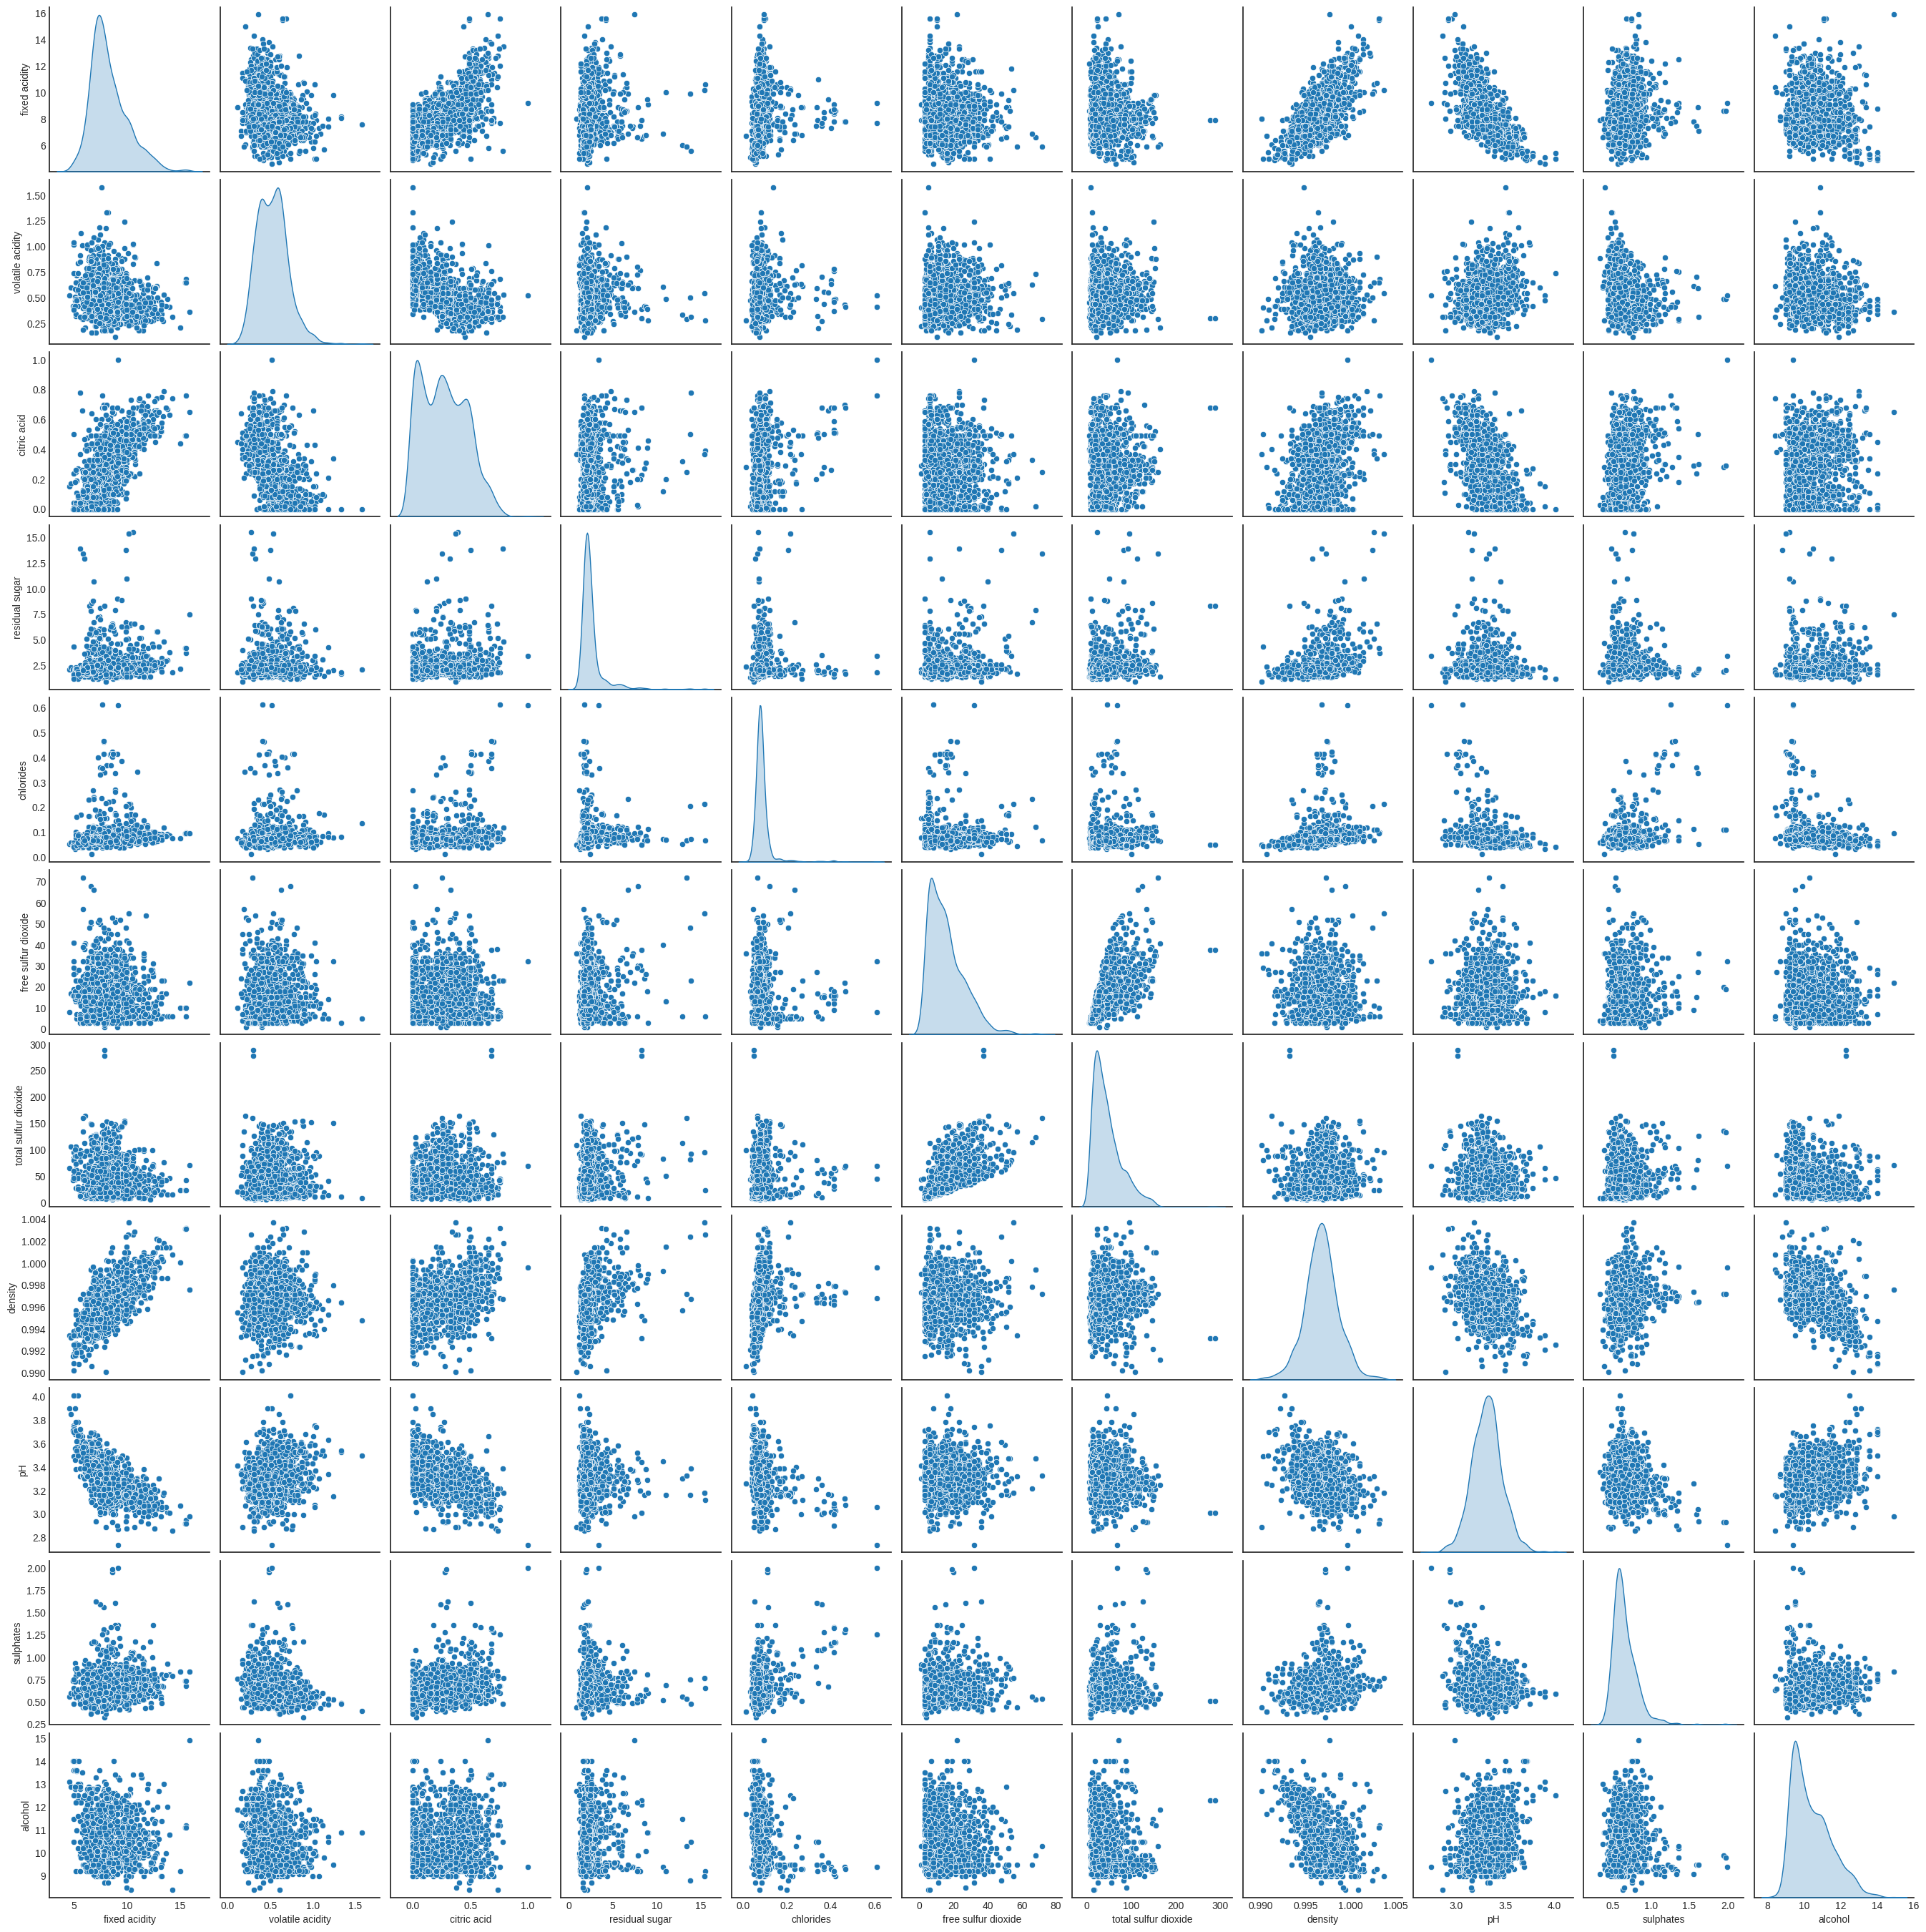

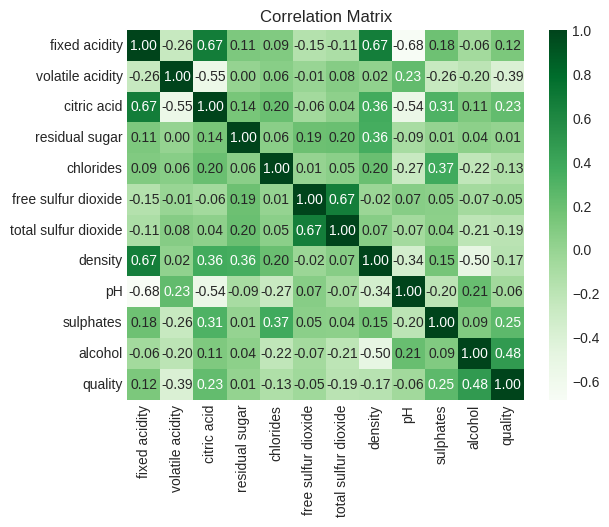


RMSE: 0.6245199307980124
Coefficient of Determination (R^2): 0.403180341279623
Locally Weighted Linear Regression (using lowess) Results:
RMSE: 0.7532454199311616
Coefficient of Determination (R^2): 0.13179253941211544

Ridge Regression Results:
RMSE: 0.6245665790840194
Coefficient of Determination (R^2): 0.40309117950100315

Random Forest Regression Results:
RMSE: 0.5488516420673258
Coefficient of Determination (R^2): 0.5390429623873638


In [54]:
#Load data into a Pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data= pd.read_csv(url, sep=';')
# 1. Display pairplots for numerical features
sns.pairplot(wine_data,
             vars=wine_data.columns[:-1],
             kind='scatter',
             diag_kind='kde')
plt.show()

# Correlation matrix heatmap
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f")
plt.title('Correlation Matrix')
plt.legend()
plt.show()

# 2. Use linear regression to estimate the quality.
# Output the Root Mean Square Error (RMSE) and Coefficient of Determination.
# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions on the test set
y_pred = model.predict(X_test)

# Calculate rmse and Coefficient of Determination
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nRMSE:", rmse)
print("Coefficient of Determination (R^2):", r2)


# 3.
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Fit locally weighted linear regression using lowess for each feature
y_pred_lowess_list = []

for feature in X_train.columns:
    lowess_smoothed = sm.nonparametric.lowess(y_train, X_train[feature])
    y_pred_lowess = np.interp(X_test[feature], lowess_smoothed[:, 0], lowess_smoothed[:, 1])
    y_pred_lowess_list.append(y_pred_lowess)

# Combine predictions for all features
y_pred_lowess = np.mean(y_pred_lowess_list, axis=0)

# Calculate RMSE and Coefficient of Determination for lowess
rmse_lowess = sqrt(mean_squared_error(y_test, y_pred_lowess))
r2_lowess = r2_score(y_test, y_pred_lowess)

print("Locally Weighted Linear Regression (using lowess) Results:")
print("RMSE:", rmse_lowess)
print("Coefficient of Determination (R^2):", r2_lowess)



#######  4.

# Initialize/train Ridge Regression model
 # You can adjust the alpha to adjust hyperparameter
ridge_model = Ridge(alpha=0.0001)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE and Coefficient of Determination for Ridge Regression
rmse_ridge = sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Results:")
print("RMSE:", rmse_ridge)
print("Coefficient of Determination (R^2):", r2_ridge)


#using random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Initialize and train Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate RMSE and Coefficient of Determination for Random Forest Regression
rmse_random_forest = sqrt(mean_squared_error(y_test, y_pred_random_forest))
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("\nRandom Forest Regression Results:")
print("RMSE:", rmse_random_forest)
print("Coefficient of Determination (R^2):", r2_random_forest)

For number 4, I searched for different regression models to use and picked two. I went with a decision tree model, Random forest regression, and ridge regression.

